In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [26]:
dtype1 = {"TDB":"int32"}
usecols1 = ["TDB","DateTime", "電力需要"]
df_1 = pd.read_csv("電力需給データ.csv", parse_dates=["DateTime"], index_col=["DateTime"], encoding="shift_jis", dtype=dtype1, usecols=usecols1)
df_1 = df_1.dropna()
df_1 = df_1.groupby(["TDB"])
df_1 = df_1.resample("H").mean()
df_1

TDB   電力需要
TDB       DateTime                               
10132818  2011-01-01 00:00:00   10132818.0  434.9
          2011-01-01 01:00:00   10132818.0  451.8
          2011-01-01 02:00:00   10132818.0  449.0
          2011-01-01 03:00:00   10132818.0  439.6
          2011-01-01 04:00:00   10132818.0  424.8
...                                    ...    ...
900001432 2020-04-07 19:00:00  900001432.0   86.0
          2020-04-07 20:00:00  900001432.0   84.0
          2020-04-07 21:00:00  900001432.0   79.0
          2020-04-07 22:00:00  900001432.0   73.0
          2020-04-07 23:00:00  900001432.0   68.0

[733680 rows x 2 columns]

In [27]:
dtype2 = {"BlockNo":"int32", "TDB":"int32"}
usecols2 = ["TDB","DateTime", "外気温"]
df_2 = pd.read_csv("電力需給データ_外気温データ.csv", parse_dates=["DateTime"], index_col=["DateTime"], encoding="shift_jis", dtype=dtype2, usecols=usecols2)
df_2 = df_2.dropna()
df_2 = df_2.groupby(["TDB"])
df_2 = df_2.resample("H").mean()
df_2

TDB   外気温
TDB       DateTime                              
10132818  2010-01-02 01:00:00   10132818.0   2.2
          2010-01-02 02:00:00   10132818.0   1.6
          2010-01-02 03:00:00   10132818.0   1.5
          2010-01-02 04:00:00   10132818.0   1.3
          2010-01-02 05:00:00   10132818.0   1.2
...                                    ...   ...
900001432 2020-04-06 20:00:00  900001432.0  19.8
          2020-04-06 21:00:00  900001432.0  19.7
          2020-04-06 22:00:00  900001432.0  19.7
          2020-04-06 23:00:00  900001432.0  19.4
          2020-04-07 00:00:00  900001432.0  18.9

[899520 rows x 2 columns]

In [31]:
df_3 = pd.concat([df_1, df_2], axis=1, join = "inner",sort=1)
df_3 = df_3.dropna()
df_3["外気温"] = round(df_3["外気温"]*2)/2
df_3["電力需要"] = round(df_3["電力需要"]*2)/2
print(df_3)

df_4 = df_3.drop(["TDB"],axis=1)
df_4 = df_4.reset_index()
df_4 = df_4.drop(["DateTime"],axis=1)
df_4 = df_4.groupby(["TDB","外気温"]).mean()
df_4

                                       TDB   電力需要          TDB   外気温
TDB       DateTime                                                  
10132818  2011-01-01 00:00:00   10132818.0  435.0   10132818.0  -1.5
          2011-01-01 01:00:00   10132818.0  452.0   10132818.0  -2.0
          2011-01-01 02:00:00   10132818.0  449.0   10132818.0  -1.5
          2011-01-01 03:00:00   10132818.0  439.5   10132818.0  -1.5
          2011-01-01 04:00:00   10132818.0  425.0   10132818.0  -1.5
...                                    ...    ...          ...   ...
900001432 2020-04-06 20:00:00  900001432.0   82.0  900001432.0  20.0
          2020-04-06 21:00:00  900001432.0   78.0  900001432.0  19.5
          2020-04-06 22:00:00  900001432.0   75.0  900001432.0  19.5
          2020-04-06 23:00:00  900001432.0   70.0  900001432.0  19.5
          2020-04-07 00:00:00  900001432.0   66.0  900001432.0  19.0

[681867 rows x 4 columns]


電力需要
TDB       外気温              
10132818  -14.0  495.000000
          -13.5  497.000000
          -13.0  494.500000
          -12.5  519.500000
          -12.0  498.566667
...                     ...
900001432  32.5  135.892857
           33.0  137.528090
           33.5  141.333333
           34.0  141.142857
           34.5  148.000000

[807 rows x 1 columns]

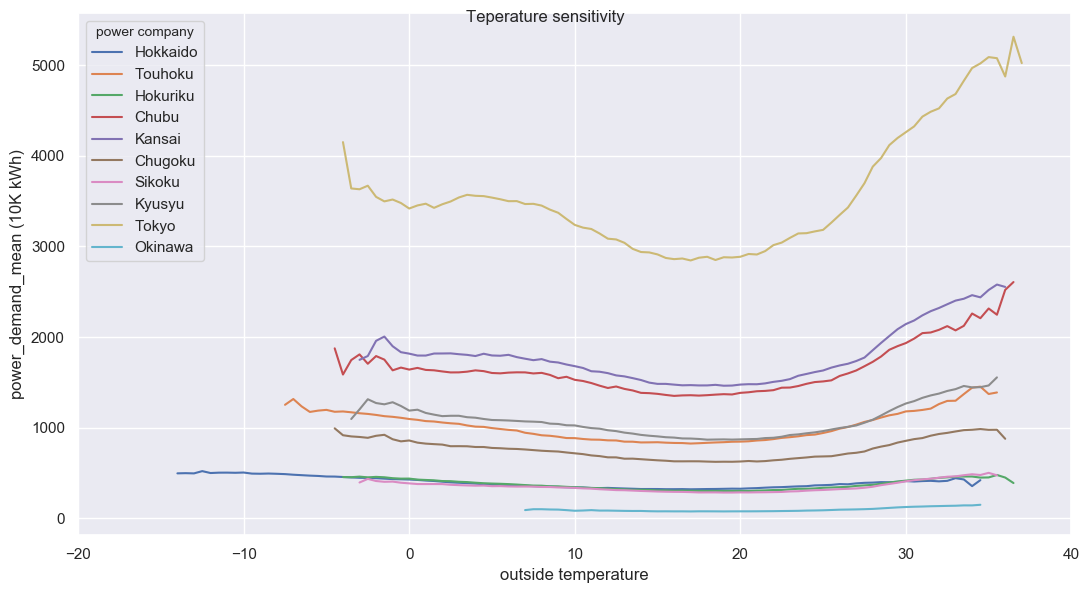

In [266]:
fig = plt.figure(figsize=(11, 6), dpi=100, facecolor='w', linewidth=0, edgecolor='w',tight_layout=True)
ax = fig.add_subplot(1,1,1,xlabel="outside temperature", ylabel="power_demand_mean (10K kWh)", xlim=(-20.0,40.0)) 
fig.suptitle("Teperature sensitivity")
#col_list = ["北海道電力","東北電力","北陸電力","中部電力","関西電力","中国電力","四国電力","九州電力","東京電力","沖縄電力"]
col_list = ["Hokkaido","Touhoku","Hokuriku","Chubu","Kansai","Chugoku","Sikoku","Kyusyu","Tokyo","Okinawa"]

for key, grp in df_4.reset_index().groupby("TDB"):
    ax.plot(grp["外気温"],grp["電力需要"],label=key)
    ax.legend(title="power company",labels=col_list,loc="best")
    plt.savefig("homework_png_1")
plt.show()


In [191]:
df1 = pd.read_csv("郵便番号_電力会社関係表.csv",usecols=[1,2,3,4])
df1 = df1.rename(columns={"電力会社":"TDB"})
df1

,都道府県コード,地方公共団体コード,市区町村,TDB
0,1,11029,札幌市,10132818
1,1,11029,札幌市,10132818
2,1,11029,札幌市,10132818
3,1,11029,札幌市,10132818
4,1,11029,札幌市,10132818
...,...,...,...,...
105214,6,64611,遊佐町,100034834
105215,6,64611,遊佐町,100034834
105216,6,64611,遊佐町,100034834
105217,6,64611,遊佐町,100034834


In [176]:
df2 = pd.read_csv("2015_市区町村別人口.csv", encoding="cp932", header=10, usecols=[0,1,6,7,8])
df2.columns = ["都道府県コード","市区町村コード","都道府県","市区町村","人口"]
df2["人口"] = df2["人口"].str.replace(",","").astype(int)
print(df2.dtypes)
df2

都道府県コード     int64
市区町村コード     int64
都道府県       object
市区町村       object
人口          int32
dtype: object


,都道府県コード,市区町村コード,都道府県,市区町村,人口
0,0,0,全国,全国,127094745
1,1,1000,北海道,北海道,5381733
2,1,1100,北海道,札幌市,1952356
3,1,1101,北海道,札幌市 中央区,237627
4,1,1102,北海道,札幌市 北区,285321
...,...,...,...,...,...
1960,47,47361,沖縄県,久米島町,7755
1961,47,47362,沖縄県,八重瀬町,29066
1962,47,47375,沖縄県,多良間村,1194
1963,47,47381,沖縄県,竹富町,3998


In [200]:
df3 = pd.merge(df1, df2, on="市区町村")
df3.drop_duplicates(subset=["市区町村"], inplace=True)
print(df3.dtypes)
df3 = df3.groupby(["TDB"]).sum()
df3 = df3.drop(["都道府県コード_x","地方公共団体コード","都道府県コード_y","市区町村コード"],axis=1)
df3

都道府県コード_x     int64
地方公共団体コード     int64
市区町村         object
TDB           int64
都道府県コード_y     int64
市区町村コード       int64
都道府県         object
人口            int32
dtype: object


,人口
TDB,
10132818,5373967
100034834,11121847
370053821,2918430
400083612,15777163
580111183,20548887
600028671,7417978
710029011,3772724
800035241,5789419
811015442,44885489


In [261]:
df4 = pd.read_csv("電力需給データ.csv", parse_dates=["DateTime"], index_col=["DateTime"], encoding="shift_jis", dtype=dtype1, usecols=usecols1)
df4 = df4.dropna()
df4 = df4.groupby(["TDB"])
df4 = df4["電力需要"].resample("H").mean()
df4 = df4.reset_index()
df4 = pd.merge(df3, df4, on="TDB")
df4["1人当たり"] = df4["電力需要"] / df4["人口"] * 10000
df4

,TDB,人口,DateTime,電力需要,1人当たり
0,10132818,5373967,2011-01-01 00:00:00,434.9,0.809272
1,10132818,5373967,2011-01-01 01:00:00,451.8,0.840720
2,10132818,5373967,2011-01-01 02:00:00,449.0,0.835509
3,10132818,5373967,2011-01-01 03:00:00,439.6,0.818018
4,10132818,5373967,2011-01-01 04:00:00,424.8,0.790478
...,...,...,...,...,...
689659,811015442,44885489,2020-04-07 19:00:00,3391.0,0.755478
689660,811015442,44885489,2020-04-07 20:00:00,3280.0,0.730748
689661,811015442,44885489,2020-04-07 21:00:00,3157.0,0.703345
689662,811015442,44885489,2020-04-07 22:00:00,3000.0,0.668367


In [238]:
df5 = pd.read_csv("電力需給データ_外気温データ.csv", parse_dates=["DateTime"], index_col=["DateTime"], encoding="shift_jis", dtype=dtype2, usecols=usecols2)
df5 = df5.dropna()
df5 = df5.groupby(["TDB"])
df5 = df5["外気温"].resample("H").mean()
df5 = df5.reset_index()
df5

,TDB,DateTime,外気温
0,10132818,2010-01-02 01:00:00,2.2
1,10132818,2010-01-02 02:00:00,1.6
2,10132818,2010-01-02 03:00:00,1.5
3,10132818,2010-01-02 04:00:00,1.3
4,10132818,2010-01-02 05:00:00,1.2
...,...,...,...
899515,900001432,2020-04-06 20:00:00,19.8
899516,900001432,2020-04-06 21:00:00,19.7
899517,900001432,2020-04-06 22:00:00,19.7
899518,900001432,2020-04-06 23:00:00,19.4


In [262]:
df6 = pd.concat([df4, df5], axis=1, join = "inner",sort=1)
df6 = df6.dropna()
df6["外気温"] = round(df6["外気温"]*2)/2
#df6["1人当たり"] = round(df6["1人当たり"]*2)/2
print(df6)

df6.columns = ["TDB_x","人口", "DateTime", "電力需要", "1人当たり", "TDB_y", "DateTime", "外気温"]
df6 = df6.drop(["TDB_y"],axis=1)
df6 = df6.reset_index()
df6 = df6.drop(["DateTime","電力需要","人口","index"],axis=1)
df6 = df6.groupby(["TDB_x","外気温"]).mean()
df6

              TDB        人口            DateTime    電力需要     1人当たり        TDB  \
0        10132818   5373967 2011-01-01 00:00:00   434.9  0.809272   10132818   
1        10132818   5373967 2011-01-01 01:00:00   451.8  0.840720   10132818   
2        10132818   5373967 2011-01-01 02:00:00   449.0  0.835509   10132818   
3        10132818   5373967 2011-01-01 03:00:00   439.6  0.818018   10132818   
4        10132818   5373967 2011-01-01 04:00:00   424.8  0.790478   10132818   
...           ...       ...                 ...     ...       ...        ...   
689659  811015442  44885489 2020-04-07 19:00:00  3391.0  0.755478  800035241   
689660  811015442  44885489 2020-04-07 20:00:00  3280.0  0.730748  800035241   
689661  811015442  44885489 2020-04-07 21:00:00  3157.0  0.703345  800035241   
689662  811015442  44885489 2020-04-07 22:00:00  3000.0  0.668367  800035241   
689663  811015442  44885489 2020-04-07 23:00:00  2821.0  0.628488  800035241   

                  DateTime   外気温  
0   

1人当たり
TDB_x     外気温            
10132818  -13.5  0.860910
          -13.0  0.846023
          -12.5  0.888560
          -12.0  0.871344
          -11.5  0.889759
...                   ...
811015442  33.5  0.792285
           34.0  0.828472
           34.5  0.796471
           35.0  0.852529
           35.5  0.860857

[765 rows x 1 columns]

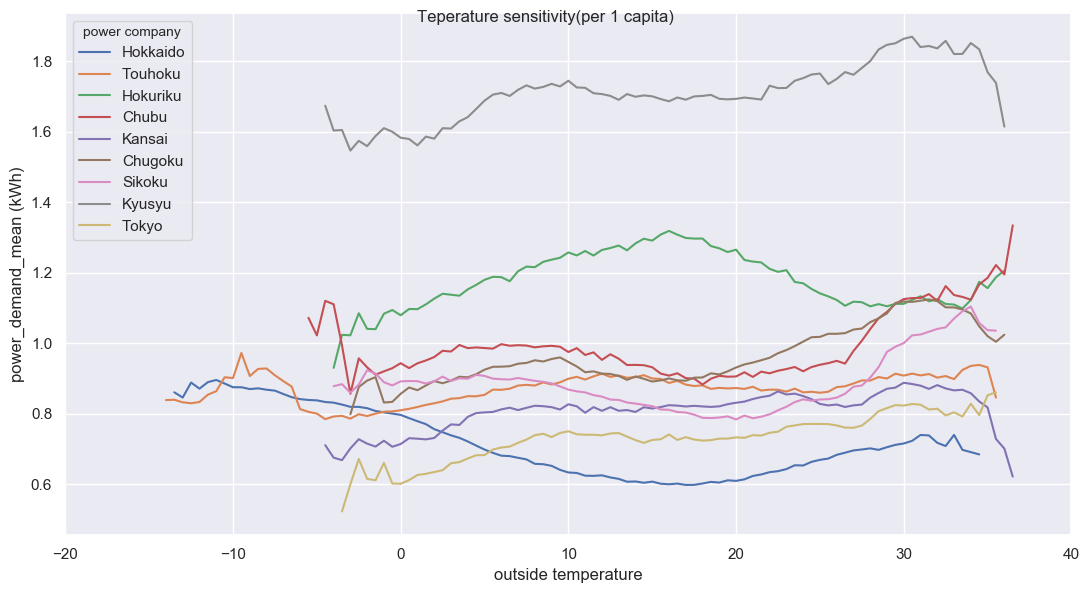

In [267]:
fig = plt.figure(figsize=(11, 6), dpi=100, facecolor='w', linewidth=0, edgecolor='w',tight_layout=True)
ax = fig.add_subplot(1,1,1,xlabel="outside temperature", ylabel="power_demand_mean (kWh)", xlim=(-20.0,40.0)) 
fig.suptitle("Teperature sensitivity(per 1 capita)")
#col_list = ["北海道電力","東北電力","北陸電力","中部電力","関西電力","中国電力","四国電力","九州電力","東京電力","沖縄電力"]
col_list = ["Hokkaido","Touhoku","Hokuriku","Chubu","Kansai","Chugoku","Sikoku","Kyusyu","Tokyo","Okinawa"]

for key, grp in df6.reset_index().groupby("TDB_x"):
    ax.plot(grp["外気温"],grp["1人当たり"],label=key)
    ax.legend(title="power company",labels=col_list,loc="best")
    plt.savefig("homework_png_2")
plt.show()
